GENETIC ALGORITHM FOR CONTINUOUS OPTIMIZATION

Aim: To write a python code to implement genetic algorithm for continuous optimization to minimize or maximize an objective function. 

## Implementing Continous GA

In [1]:
from numpy.random import randint
from numpy.random import rand
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# decode bitstring to numbers
def decode(bounds, n_bits, bitstring):
	decoded = list()
	largest = 2**n_bits
	for i in range(len(bounds)):
		# extract the substring
		start, end = i * n_bits, (i * n_bits)+n_bits
		substring = bitstring[start:end]
		# convert bitstring to a string of chars
		chars = ''.join([str(s) for s in substring])
		# convert string to integer
		integer = int(chars, 2)
		# scale integer to desired range
		value = bounds[i][0] + (integer/largest) * (bounds[i][1] - bounds[i][0])
		# store
		decoded.append(value)
	return decoded

In [3]:
# tournament selection
def selection(pop, scores, k=3):
	# first random selection
	selection_ix = randint(len(pop))
	for ix in randint(0, len(pop), k-1):
		# check if better (e.g. perform a tournament)
		if scores[ix] < scores[selection_ix]:
			selection_ix = ix
	return pop[selection_ix]

In [4]:
# crossover two parents to create two children
def crossover(p1, p2, r_cross):
	# children are copies of parents by default
	c1, c2 = p1.copy(), p2.copy()
	# check for recombination
	if rand() < r_cross:
		# select crossover point that is not on the end of the string
		pt = randint(1, len(p1)-2)
		# perform crossover
		c1 = p1[:pt] + p2[pt:]
		c2 = p2[:pt] + p1[pt:]
	return [c1, c2]

In [5]:
# mutation operator
def mutation(bitstring, r_mut):
	for i in range(len(bitstring)):
		# check for a mutation
		if rand() < r_mut:
			# flip the bit
			bitstring[i] = 1 - bitstring[i]

In [6]:
# genetic algorithm
def continious_ga(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut):
	# initial population of random bitstring
	pop = [randint(0, 2, n_bits*len(bounds)).tolist() for _ in range(n_pop)]
	# keep track of best solution
	best, best_eval = 0, objective(decode(bounds, n_bits, pop[0]))
	best_track = []
	# enumerate generations
	for gen in range(n_iter):
		# decode population
		decoded = [decode(bounds, n_bits, p) for p in pop]
		# evaluate all candidates in the population
		scores = [objective(d) for d in decoded]
		# check for new best solution
		for i in range(n_pop):
			if scores[i] < best_eval:
				best, best_eval = decode(bounds, n_bits, pop[i]), scores[i]
				best_track.append(best)
				print(">iteration %d, new best f(%s) = %f" % (gen,  decoded[i], scores[i]))
		# select parents
		selected = [selection(pop, scores) for _ in range(n_pop)]
		# create the next generation
		children = list()
		for i in range(0, n_pop, 2):
			# get selected parents in pairs
			p1, p2 = selected[i], selected[i+1]
			# crossover and mutation
			for c in crossover(p1, p2, r_cross):
				# mutation
				mutation(c, r_mut)
				# store for next generation
				children.append(c)
		# replace population
		pop = children
	return [best, best_eval, best_track]

## Functions for plotting

In [7]:
def plot_optimization(fitness,minx,maxx,best_pos_track):
    x = np.linspace(minx,maxx,300)
    X1,X2 = np.meshgrid(x,x)
    X = np.dstack([X1,X2])
    Y = np.apply_along_axis(fitness,-1,X)
    plt.figure(figsize=(10,10))
    plt.contourf(X1,X2,Y,levels=25,cmap="Blues")
    x,y = np.array(best_pos_track).T
    plt.plot(x,y,"r")
    plt.plot(*best_pos_track[0],"o",label="start")
    plt.plot(*best_pos_track[-1],"X",label="end")
    plt.legend()
    plt.show()

## Hyperparameter setup

In [8]:
# define range for input
bounds = [[-5.0, 5.0], [-5.0, 5.0]]
# define the total iterations
n_iter = 100
# bits per variable
n_bits = 16
# define the population size
n_pop = 30
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / (float(n_bits) * len(bounds))

## Sphere Function using GA

In [9]:
# Sphere function
def sphere(x):
	x = np.array(x)
	return np.sum(x**2)

In [10]:
np.random.seed(0)
best, score , best_track = continious_ga(sphere, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print(f'Best solution: {best}')
print(f'Fitness score of the best solution: {score:.5f}')

>iteration 0, new best f([2.123870849609375, -1.30462646484375]) = 6.212878
>iteration 0, new best f([0.12115478515625, -1.26190185546875]) = 1.607075
>iteration 0, new best f([-0.63995361328125, 0.8477783203125]) = 1.128269
>iteration 1, new best f([-0.63018798828125, 0.84869384765625]) = 1.117418
>iteration 2, new best f([-0.63018798828125, 0.832672119140625]) = 1.090480
>iteration 3, new best f([0.12176513671875, 0.832672119140625]) = 0.708170
>iteration 6, new best f([0.58074951171875, 0.535888671875]) = 0.624447
>iteration 7, new best f([0.58074951171875, 0.207672119140625]) = 0.380398
>iteration 8, new best f([-0.16204833984375, 0.287017822265625]) = 0.108639
>iteration 9, new best f([-0.163116455078125, 0.207672119140625]) = 0.069735
>iteration 12, new best f([-0.17303466796875, 0.168609619140625]) = 0.058370
>iteration 13, new best f([-0.16204833984375, 0.118865966796875]) = 0.040389
>iteration 14, new best f([-0.163116455078125, 0.051727294921875]) = 0.029283
>iteration 16, ne

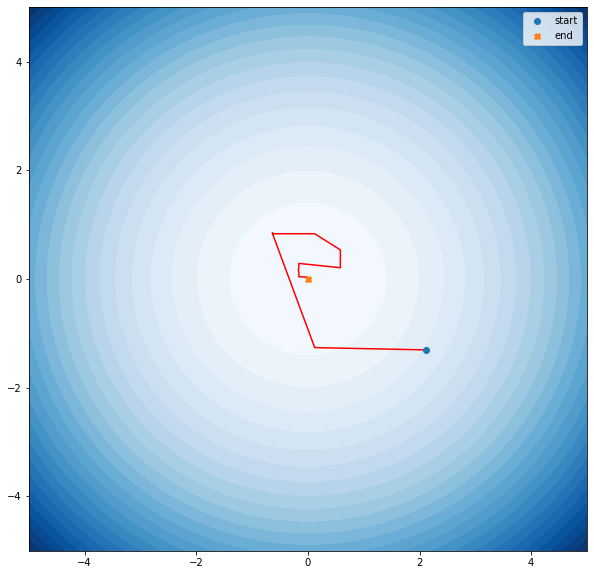

In [11]:
plot_optimization(sphere,-5,5,best_track)

## Rastrigin Function using GA

In [12]:
def rastrigin(x):
    x = np.array(x)
    return 10*x.shape[0] + np.sum(x**2 - 10 * np.cos(2*np.pi*x))

In [13]:
np.random.seed(0)
best, score , best_track = continious_ga(rastrigin, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print(f'Best solution: {best}')
print(f'Fitness score of the best solution: {score:.5f}')

>iteration 0, new best f([2.123870849609375, -1.30462646484375]) = 22.457109
>iteration 0, new best f([0.12115478515625, -1.26190185546875]) = 15.114368
>iteration 1, new best f([3.045806884765625, -0.05462646484375]) = 10.274523
>iteration 1, new best f([0.119781494140625, -1.92657470703125]) = 7.472413
>iteration 3, new best f([-2.014007568359375, -0.05462646484375]) = 4.681184
>iteration 5, new best f([1.014404296875, -0.110321044921875]) = 3.389856
>iteration 6, new best f([1.011962890625, -0.110321044921875]) = 3.372217
>iteration 7, new best f([1.009979248046875, -0.055694580078125]) = 1.648876
>iteration 8, new best f([0.03662109375, -0.055694580078125]) = 0.874065
>iteration 9, new best f([0.03662109375, -0.032196044921875]) = 0.469852
>iteration 10, new best f([0.02685546875, -0.032196044921875]) = 0.347700
>iteration 12, new best f([0.02197265625, -0.032196044921875]) = 0.300585
>iteration 12, new best f([0.015869140625, -0.032196044921875]) = 0.254873
>iteration 13, new best

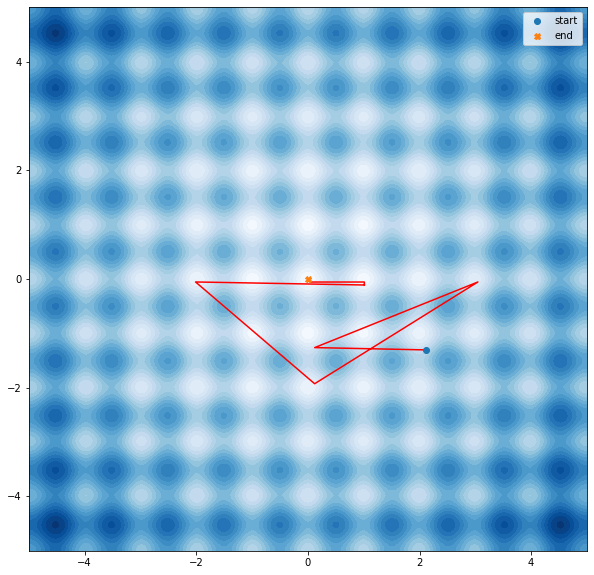

In [14]:
plot_optimization(rastrigin,-5,5,best_track)